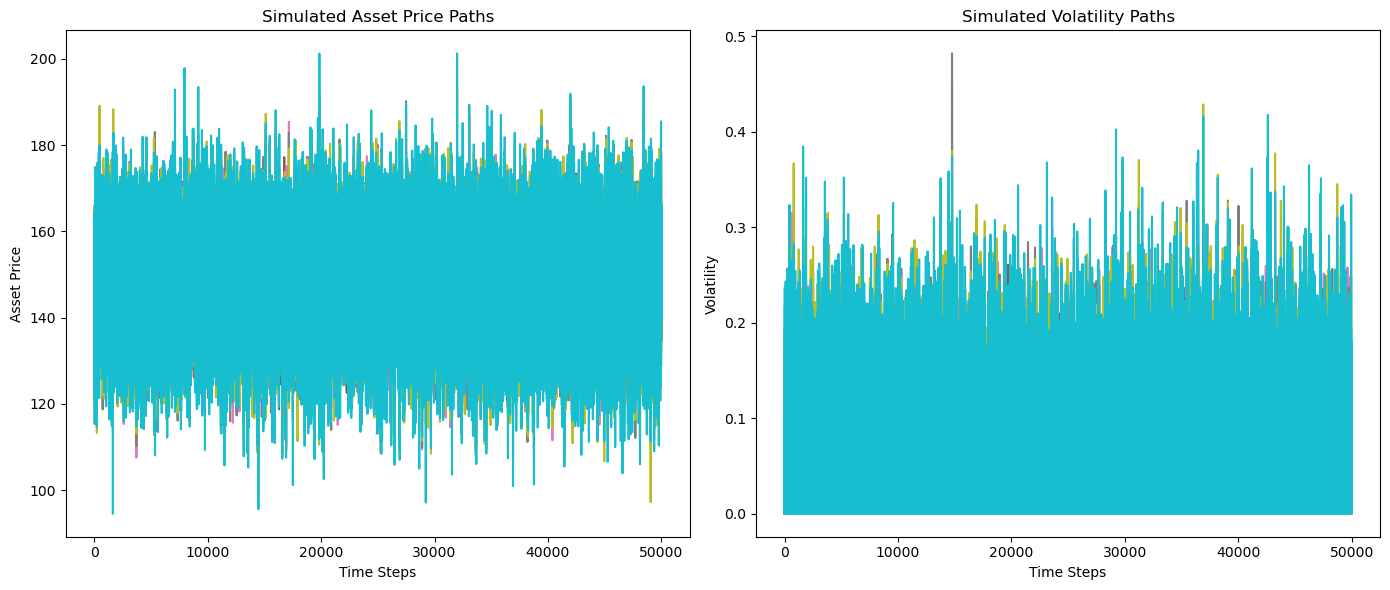

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Modified Heston model simulation function
def simulate_vol_asset_paths(P0, v0, corr, long_term_vol, vol_vol, rev_speed, rf_rate, delta_t, total_steps, num_simulations):
    # Initialize matrices for log prices and volatility paths
    log_prices = np.zeros((num_simulations, total_steps + 1))
    volatility_paths = np.zeros((num_simulations, total_steps + 1))
    
    # Set initial values
    log_prices[:, 0] = np.log(P0)
    volatility_paths[:, 0] = v0
    
    # Generate orthogonal random variables
    randoms_base = np.random.normal(size=(total_steps, num_simulations))
    randoms_orth = np.random.normal(size=(total_steps, num_simulations))
    
    # Construct correlated Brownian motions
    brownian_correlated = corr * randoms_base + np.sqrt(1 - corr**2) * randoms_orth
    
    # Simulate paths
    for step in range(total_steps):
        current_vol = volatility_paths[:, step]
        sqrt_vol = np.sqrt(np.maximum(current_vol, 1e-8))  # Ensure non-negative volatility
        
        # Update volatility paths
        vol_diffusion = vol_vol * sqrt_vol * np.sqrt(delta_t) * brownian_correlated[step]
        vol_drift = rev_speed * (long_term_vol - current_vol) * delta_t
        volatility_paths[:, step + 1] = np.maximum(current_vol + vol_drift + vol_diffusion, 0)
        
        # Update asset price paths
        price_drift = (rf_rate - 0.5 * current_vol) * delta_t
        price_diffusion = sqrt_vol * np.sqrt(delta_t) * randoms_base[step]
        log_prices[:, step + 1] = log_prices[:, step] + price_drift + price_diffusion
    
    return np.exp(log_prices), volatility_paths

S0 = 150  # Initial stock price (changed from 100 to 150)
r = 0.03  # Risk-free rate (changed from 0.05 to 0.03)
q = 0.02  # Dividend yield (changed from 0.00 to 0.02)
v0 = 0.05  # Initial variance (changed from 0.0228 to 0.05)
theta = 0.04  # Long-term mean variance (changed from 0.0363 to 0.04)
kappa = 0.1  # Rate of mean reversion (changed from 0.0807 to 0.1)
sigma = 0.8  # Volatility of variance (changed from 1.1760 to 0.8)
rho = -0.5  # Correlation between stock and variance (changed from -0.3021 to -0.5)
N_paths = 50_000  # Number of paths (changed from 100,000 to 50,000)
T_steps = 200  # Number of time steps (changed from 100 to 200)
T = 2  # Time horizon (changed from 1 to 2)
dt = T / T_steps  # Time step

# Run simulation
np.random.seed(42)  # Set seed for reproducibility
price_paths, vol_paths = simulate_vol_asset_paths(
    P0=S0, v0=v0, corr=rho, long_term_vol=theta, vol_vol=sigma, rev_speed=kappa, rf_rate=r, delta_t=dt, total_steps=T_steps, num_simulations=N_paths
)

# Plot results
plt.figure(figsize=(14, 6))

# Plot asset price paths
plt.subplot(1, 2, 1)
plt.plot(price_paths[:, :10])  # Plot first 10 paths
plt.title("Simulated Asset Price Paths")
plt.xlabel("Time Steps")
plt.ylabel("Asset Price")

# Plot volatility paths
plt.subplot(1, 2, 2)
plt.plot(vol_paths[:, :10])  # Plot first 10 paths
plt.title("Simulated Volatility Paths")
plt.xlabel("Time Steps")
plt.ylabel("Volatility")

plt.tight_layout()
plt.show()